## Описание датасета

Обучающая выборка Fashion MNIST содержит 60 000 черно-белых
изображений размером 28x28 пикселей. Тестовая выборка содержит 10000
изображений.

Каждое изображение имеет одну из меток:

* 0 – футболка,
* 1 – брюки,
* 2 – пуловер,
* 3 – платье,
* 4 – куртка,
* 5 – сандалии,
* 6 – рубашка,
* 7 – кроссовки,
* 8 – сумка,
* 9 – полусапоги.

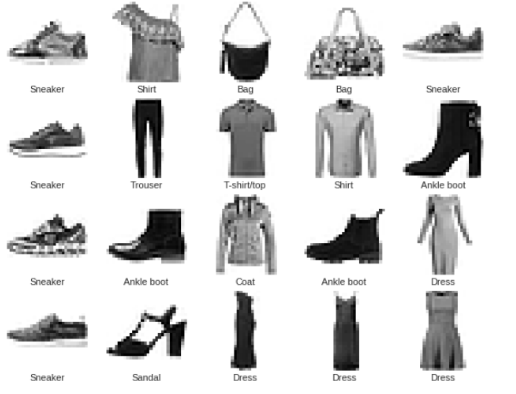

## Код

Задача: построить модель, которая будет классифицировать одежду по изображению.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

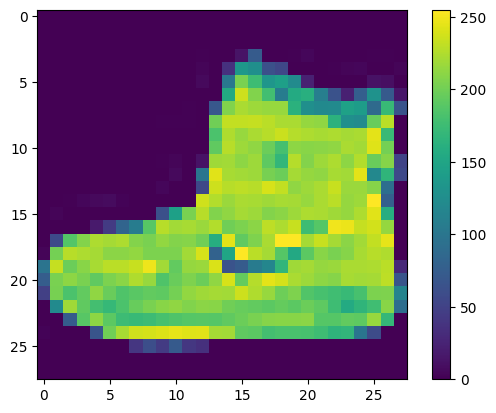

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [ ]:
#нормализируем эти значения

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#строим модель классификации на основе классической нейронной сети

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод структуры модели
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

Для улучшения точности квалификации добавим коллбэки.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(train_images, train_labels,
                    epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[reduce_lr, early_stop])


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 9ms/step - accuracy: 0.7323 - loss: 0.7957 - val_accuracy: 0.8421 - val_loss: 0.4284 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8317 - loss: 0.4777 - val_accuracy: 0.8599 - val_loss: 0.3839 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8491 - loss: 0.4249 - val_accuracy: 0.8645 - val_loss: 0.3746 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8519 - loss: 0.4109 - val_accuracy: 0.8618 - val_loss: 0.3671 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8604 - loss: 0.3873 - val_accuracy: 0.8756 - val_loss: 0.3473 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8654 - loss: 0.3769 - val_accuracy: 0.8687 - val_loss: 0.3647 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Потери на тестовых данных: 0.2772
Точность на тестовых данных: 0.9045


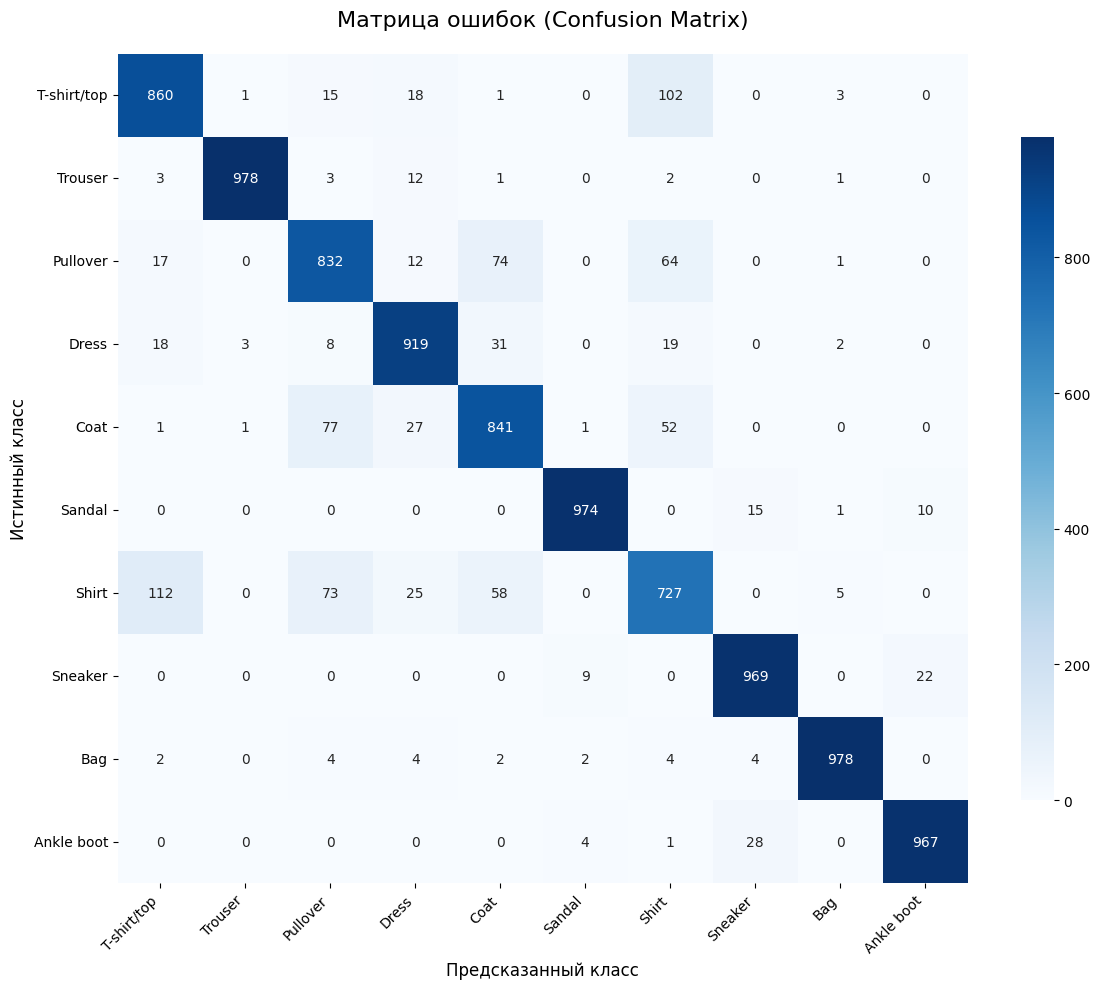

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

#Делаем предсказания на тестовых данных

test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Базовые метрики
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Потери на тестовых данных: {test_loss:.4f}')
print(f'Точность на тестовых данных: {test_acc:.4f}')


cm = confusion_matrix(test_labels, test_predictions_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'shrink': 0.8})
plt.title('Матрица ошибок (Confusion Matrix)', fontsize=16, pad=20)
plt.xlabel('Предсказанный класс', fontsize=12)
plt.ylabel('Истинный класс', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
precision = precision_score(test_labels, test_predictions_classes, average='weighted')
recall = recall_score(test_labels, test_predictions_classes, average='weighted')
f1 = f1_score(test_labels, test_predictions_classes, average='weighted')

print("ОСНОВНЫЕ МЕТРИКИ\n")
print(f'Accuracy (Точность): {test_acc:.4f}')
print(f'Precision (Точность): {precision:.4f}')
print(f'Recall (Полнота): {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

ОСНОВНЫЕ МЕТРИКИ

Accuracy (Точность): 0.9045
Precision (Точность): 0.9045
Recall (Полнота): 0.9045
F1-Score: 0.9045


Путем усложнения архитектуры и добавления дропаутов, батч-нормализации и коллбэков удалось достичь 90-91% точности квалификации класса одежды по картинке.

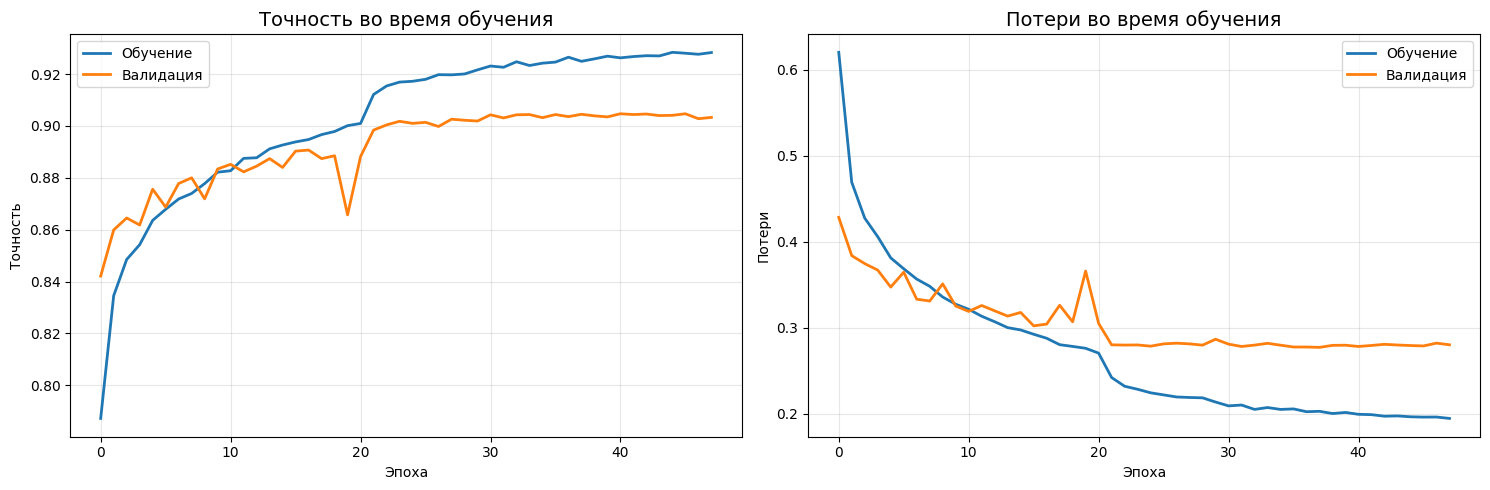

In [ ]:
# Анализ кривых обучения
plt.figure(figsize=(15, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Обучение', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Валидация', linewidth=2)
plt.title('Точность во время обучения', fontsize=14)
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(alpha=0.3)

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Обучение', linewidth=2)
plt.plot(history.history['val_loss'], label='Валидация', linewidth=2)
plt.title('Потери во время обучения', fontsize=14)
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()